In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 14
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.6
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[14_10_51_300_0.6_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[14_10_51_300_0.6_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.5996

Best Fitness:	1400.1373
Solution:	1400.0000
Diff:		0.1373

[0:07:39][----------] 1.96% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6524

Best Fitness:	1400.1423
Solution:	1400.0000
Diff:		0.1423

[0:14:53][----------] 3.92% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6549

Best Fitness:	1400.1229
Solution:	1400.0000
Diff:		0.1229

[0:21:52][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6236

Best Fitness:	1400.2232
Solution:	1400.0000
Diff:		0.2232

[0:28:56][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6710

Best Fitness:	1400.1427
Solution:	1400.0000
Diff:		0.1427

[0:36:19][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6889

Best Fitness:	1400.1889
Solution:	1400.0000
Diff:		0.1889

[0:42:29][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6188

Best Fitness:	1400.0879
Solution:	1400.0000
Diff:		0.0879

[0:48:25][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6586

Best Fitness:	1400.2646
Solution:	1400.0000
Diff:		0.2646

[0:54:21][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6607

Best Fitness:	1400.2340
Solution:	1400.0000
Diff:		0.2340

[1:00:20][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6874

Best Fitness:	1400.2045
Solution:	1400.0000
Diff:		0.2045

[1:06:33][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6705

Best Fitness:	1400.1048
Solution:	1400.0000
Diff:		0.1048

[1:12:47][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6777

Best Fitness:	1400.1835
Solution:	1400.0000
Diff:		0.1835

[1:18:33][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6817

Best Fitness:	1400.1743
Solution:	1400.0000
Diff:		0.1743

[1:24:30][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6463

Best Fitness:	1400.2247
Solution:	1400.0000
Diff:		0.2247

[1:30:18][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6773

Best Fitness:	1400.1910
Solution:	1400.0000
Diff:		0.1910

[1:35:47][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6679

Best Fitness:	1400.1897
Solution:	1400.0000
Diff:		0.1897

[1:41:14][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6752

Best Fitness:	1400.2487
Solution:	1400.0000
Diff:		0.2487

[1:46:39][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6008

Best Fitness:	1400.1764
Solution:	1400.0000
Diff:		0.1764

[1:51:51][####------] 35.29% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6855

Best Fitness:	1400.1826
Solution:	1400.0000
Diff:		0.1826

[1:57:04][####------] 37.25% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6494

Best Fitness:	1400.2324
Solution:	1400.0000
Diff:		0.2324

[2:02:06][####------] 39.22% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6162

Best Fitness:	1400.2142
Solution:	1400.0000
Diff:		0.2142

[2:07:22][####------] 41.18% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6359

Best Fitness:	1400.2568
Solution:	1400.0000
Diff:		0.2568

[2:12:40][####------] 43.14% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6322

Best Fitness:	1400.1724
Solution:	1400.0000
Diff:		0.1724

[2:17:53][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6909

Best Fitness:	1400.1896
Solution:	1400.0000
Diff:		0.1896

[2:23:03][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6551

Best Fitness:	1400.1693
Solution:	1400.0000
Diff:		0.1693

[2:27:39][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6705

Best Fitness:	1400.2072
Solution:	1400.0000
Diff:		0.2072

[2:32:15][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6219

Best Fitness:	1400.1361
Solution:	1400.0000
Diff:		0.1361

[2:36:46][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6392

Best Fitness:	1400.2305
Solution:	1400.0000
Diff:		0.2305

[2:41:23][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6590

Best Fitness:	1400.2626
Solution:	1400.0000
Diff:		0.2626

[2:46:03][######----] 56.86% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.5920

Best Fitness:	1400.1144
Solution:	1400.0000
Diff:		0.1144

[2:50:36][######----] 58.82% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.7065

Best Fitness:	1400.2010
Solution:	1400.0000
Diff:		0.2010

[2:55:14][######----] 60.78% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6423

Best Fitness:	1400.1784
Solution:	1400.0000
Diff:		0.1784

[2:59:44][######----] 62.75% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6240

Best Fitness:	1400.2801
Solution:	1400.0000
Diff:		0.2801

[3:04:09][######----] 64.71% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6244

Best Fitness:	1400.2223
Solution:	1400.0000
Diff:		0.2223

[3:08:01][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6587

Best Fitness:	1400.0959
Solution:	1400.0000
Diff:		0.0959

[3:11:56][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6546

Best Fitness:	1400.2592
Solution:	1400.0000
Diff:		0.2592

[3:15:41][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6302

Best Fitness:	1400.1258
Solution:	1400.0000
Diff:		0.1258

[3:19:45][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6431

Best Fitness:	1400.1648
Solution:	1400.0000
Diff:		0.1648

[3:23:31][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6618

Best Fitness:	1400.2304
Solution:	1400.0000
Diff:		0.2304

[3:27:19][########--] 76.47% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6206

Best Fitness:	1400.1690
Solution:	1400.0000
Diff:		0.1690

[3:31:11][########--] 78.43% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6904

Best Fitness:	1400.1044
Solution:	1400.0000
Diff:		0.1044

[3:35:11][########--] 80.39% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6589

Best Fitness:	1400.1453
Solution:	1400.0000
Diff:		0.1453

[3:39:02][########--] 82.35% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6802

Best Fitness:	1400.1542
Solution:	1400.0000
Diff:		0.1542

[3:42:19][########--] 84.31% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6444

Best Fitness:	1400.1900
Solution:	1400.0000
Diff:		0.1900

[3:45:36][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6289

Best Fitness:	1400.1404
Solution:	1400.0000
Diff:		0.1404

[3:48:53][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6407

Best Fitness:	1400.2353
Solution:	1400.0000
Diff:		0.2353

[3:52:04][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6485

Best Fitness:	1400.1635
Solution:	1400.0000
Diff:		0.1635

[3:55:17][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6579

Best Fitness:	1400.1299
Solution:	1400.0000
Diff:		0.1299

[3:58:34][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6489

Best Fitness:	1400.1928
Solution:	1400.0000
Diff:		0.1928

[4:01:47][##########] 96.08% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6627

Best Fitness:	1400.2152
Solution:	1400.0000
Diff:		0.2152

[4:05:00][##########] 98.04% 

Optimization ended due to max fitness evals (max = 60000.0, curr = 60000)


#Generations:	198

#FitnessEvals:	60000

Mean Fitness:	1400.6637

Best Fitness:	1400.1527
Solution:	1400.0000
Diff:		0.1527

[4:08:24][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

4:08:24

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
193,0.774633,0.355097,0.445107,0.893413,0.447382,0.719357,0.98011,1.131496,0.455045,0.662954,...,0.703444,0.539257,0.646841,0.572339,0.529782,0.98779,0.553557,0.653187,1.093588,50
194,0.774633,0.355097,0.445107,0.893413,0.447382,0.719357,0.98011,1.131496,0.455045,0.662954,...,0.703444,0.539257,0.646841,0.572339,0.529782,0.98779,0.553557,0.653187,1.093588,50
195,0.774633,0.355097,0.445107,0.893413,0.447382,0.719357,0.98011,1.131496,0.455045,0.662954,...,0.703444,0.539257,0.646841,0.572339,0.529782,0.98779,0.553557,0.653187,1.093588,50
196,0.774633,0.355097,0.445107,0.893413,0.447382,0.719357,0.98011,1.131496,0.455045,0.662954,...,0.703444,0.539257,0.646841,0.572339,0.529782,0.98779,0.553557,0.653187,1.093588,50
197,0.774633,0.355097,0.445107,0.893413,0.447382,0.719357,0.98011,1.131496,0.455045,0.662954,...,0.703444,0.539257,0.646841,0.572339,0.529782,0.98779,0.553557,0.653187,1.093588,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 0.13731851024567732

Best error for run 1: 0.1422787107348995

Best error for run 2: 0.12289114299937864

Best error for run 3: 0.22320250721600132

Best error for run 4: 0.1427011852065334

Best error for run 5: 0.18886012317989298

Best error for run 6: 0.08787610165427395

Best error for run 7: 0.26463143161436165

Best error for run 8: 0.23402473874966745

Best error for run 9: 0.2045366908039341

Best error for run 10: 0.10478653155541906

Best error for run 11: 0.18351345651808515

Best error for run 12: 0.17432780617832577

Best error for run 13: 0.22466281735455595

Best error for run 14: 0.19100911082409766

Best error for run 15: 0.1897165633943132

Best error for run 16: 0.24873095076645768

Best error for run 17: 0.17637038643329106

Best error for run 18: 0.18262229570859745

Best error for run 19: 0.2323719348078157

Best error for run 20: 0.21418817265953294

Best error for run 21: 0.2568475968716939

Best error for run 22: 0.17238026934637674

Best error for run 23: 0.18956311479814758

Best error for run 24: 0.169255243056341

Best error for run 25: 0.20720573996504754

Best error for run 26: 0.1361420074833859

Best error for run 27: 0.23046993791786008

Best error for run 28: 0.2626249914640084

Best error for run 29: 0.11444948806797584

Best error for run 30: 0.20098160657812514

Best error for run 31: 0.17844852868529415

Best error for run 32: 0.2801111618914547

Best error for run 33: 0.2223314686652884

Best error for run 34: 0.09594661908727176

Best error for run 35: 0.25920218074156764

Best error for run 36: 0.1257533510824942

Best error for run 37: 0.16475215414038757

Best error for run 38: 0.23040590820573925

Best error for run 39: 0.16901820240445886

Best error for run 40: 0.10436851046665652

Best error for run 41: 0.14529402453877083

Best error for run 42: 0.15416414261153477

Best error for run 43: 0.18996879306905612

Best error for run 44: 0.14037700308767853

Best error for run 45: 0.23530680119324643

Best error for run 46: 0.1634684859036497

Best error for run 47: 0.12985616768060027

Best error for run 48: 0.1927943046996461

Best error for run 49: 0.21518975134631546

Best error for run 50: 0.15272686015600812

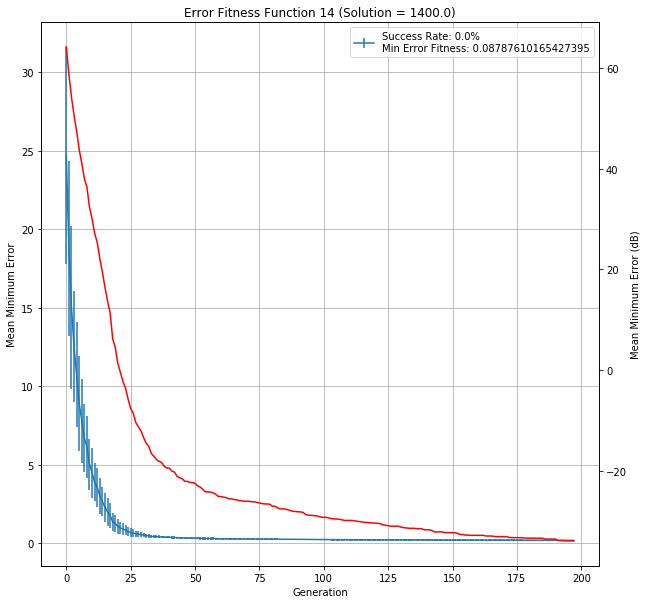

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[14_10_51_300_0.6_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,14,10,0.6,0.137319,0.142279,0.122891,0.223203,0.142701,0.18886,...,0.140377,0.235307,0.163468,0.129856,0.192794,0.21519,0.152727,0.18353,4:08:24,60000
